# Introduction to Neural Networks

A deep feedforward neural network consists of multiple nodes which mimic the biological neurons of a human brain. 

**Network:** The model is associated with a directed acyclic graph describing how the functions (layers) are composed together.

**Feedforward:** The information flows from inputs to outputs through the layers of the network.

**Neural:** The inspiration originated from neuroscience. Each element of a layer plays a role analogous to a neuron.

The goal of a feedforward neural network is to approximate some function $\large f^*$. For example, for a classifier, $\large y = f^*(x)$ maps an input $\large x$ to a category $\large y$. A feedforward network defines a mapping $\large y = f(x; \theta)$ and learns the value of the parameters $\large \theta$ that result in the best function approximation for $\large f^*$.

![python-scistack](https://icdn5.digitaltrends.com/image/artificial_neural_network_1-791x388.jpg)



# Timeline of Deep Learning

Some of the biggest accomplishments and moments in deep learning:
<li> 1943: First mathematical model of a neural network. </li>
<li> 1957: Perceptron model. </li>
<li> 1969: First AI Winter - Perceptron model was incapable of learning the simple XOR function. </li>
<li> 1986: Backpropagation allowed training of deep networks.  </li>
<li> 1989: Universal approximation theorem. </li>
<li> 1995: Second AI Winter - Learning didn't scale for larger problems and SVMs became the method of choice. </li>
<li> 1998: Gradient based learning. </li>
<li> 2010: Imagenet dataset was created and the annual Imagenet competition kicked off. </li>
<li> 2012: Neural network model halved existing Imagenet competition error. </li>
<li> 2014: Generative adversarial neural networks. </li>
<li> 2017: Google's DeepMind AlphaGo beat world number-one Go player. </li>


![python-scistack](http://beamandrew.github.io//images/deep_learning_101/imagenet_progress.png)




# Universal Approximation Theorem

**Informal Statement:**

A feedforward network with a single hidden layer containing a finite number of neurons can approximate "any" function on $\large \mathbb{R}^n$, under mild assumptions on the activation function and the target function.

**Formal Statement:**

![python-scistack](http://neuralnetworksanddeeplearning.com/images/tikz10.png)


Let ${ \large  \varphi :\mathbb {R} \to \mathbb {R} }$ be a nonconstant, bounded, and continuous function. Let ${\large  I_{m}}$ denote a compact subset of ${\large \mathbb{R}^m}$. The space of real-valued continuous functions on ${\large \displaystyle I_{m}}$ is denoted by ${\large \displaystyle C(I_{m})}$. Then, given any ${\large \displaystyle \varepsilon >0}$  and any function ${\large \displaystyle f\in C(I_{m})}$, there exist an integer ${\large \displaystyle N}$, real constants ${\large \displaystyle v_{i},b_{i}\in \mathbb {R} }$  and real vectors ${\large \displaystyle w_{i}\in \mathbb {R} ^{m}}$  for ${\large \displaystyle i=1,\ldots ,N}$  such that we may define:

$${\large \displaystyle F(x)=\sum _{i=1}^{N}v_{i}\varphi \left(w_{i}^{T}x+b_{i}\right)}$$

as an approximate realization of the function ${\large \displaystyle f}$; that is,

$${\large \displaystyle |F(x)-f(x)|<\varepsilon } $$ 

for all ${\large \displaystyle x\in I_{m}}$. In other words, functions of the form ${\large \displaystyle F(x)}$ are dense in ${\large \displaystyle C(I_{m})}$.

### No Free Lunch Theorem

Averaged over all possible data-generating distributions, every classification algorithm has the same error rate when classifying previously unobserved points. In other words, no machine learning algorithm is **universally** any better than any other. 

### Conclusion

Feedforward networks provide a universal system for representing functions. However, there is no universal procedure for examining a training set of specific examples and choosing a function that will **generalize to points not in the training set**.


# Types of Neural Networks

**Convolutional Neural Networks (CNNs):** 

<li> They are translation-invariant, i.e., features are robust to translations. </li>
<li> Convolutional layers are more efficient than fully-connected (dense) layers for images due to the lower number of parameters needed to represent convolutions. </li>
<li> Applications: Image classification, object detection, segmnetation, etc. </li>


![python-scistack](https://s3.amazonaws.com/cdn.ayasdi.com/wp-content/uploads/2018/06/21100605/Fig2GCNN1.png)

**Recurrent Neural Networks (RNNs):**

![python-scistack](https://cdn-images-1.medium.com/max/1280/1*xLcQd_xeBWHeC6CeYSJ9bA.png)

<li> Unlike feedforward networks, RNNs are networks with loops in them. This allows information to persist (memory). </li>
<li> Recurrent neural networks are great at processing sequences of data such as sentences and time series. </li>
<li> Applications: Speech recognition, handwriting recognition, language models, time series analysis, etc. </li>
<li> Long Short Term Memory (LSTM) networks are exceptional at adding short-term memory features and long-term features.

![python-scistack](https://i.ytimg.com/vi/kMLl-TKaEnc/maxresdefault.jpg)


**Autoencoders:**

<li> Unsupervised method. </li>
<li> Encoder: Compresses data. Decoder: Reconstructs original data from compressed features. </li>
<li> Applications: Compression, feature extraction, transfer learning, etc. </li>


![python-scistack](https://cdn-images-1.medium.com/max/1600/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png)


**Generative Adversarial Neural Networks (GANs):**

<li> Applications: Image (faces, anime characters) generation, style transfer, tranfer learning, etc. </li>


![python-scistack](https://www.nonteek.com/wp-content/uploads/2018/01/GAN_en.png)


In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

np.random.seed(1) # set a seed so that the results are consistent over iterations

In [2]:
def plot_decision_boundary(model, X, y, title='', one_flag=False):
    # Set min and max values of decision boundary and add padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    zz = np.c_[xx.ravel(), yy.ravel()]
    if one_flag: # one feature
        zz = zz.T
        ww = zz[0,:]**2 + zz[1,:]**2
        Z = model(ww.reshape(-1,1))
    else: # two features
        Z = model(zz)
          
    Z = Z.reshape(xx.shape)
      
    # Plot the contour and training examples
    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.title(title)
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()
    
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

## Build dataset

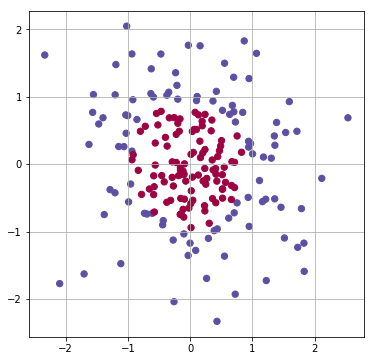

In [3]:
# Number of samples in dataset
m = 200

# Create data and labels
gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=m, n_features=2, n_classes=2, shuffle=True, random_state=None)
X, Y = gaussian_quantiles # data and labels
X, Y = X.T, Y.reshape(1, m)

# Visualize the dataset
plt.figure(figsize=(6,6))
plt.scatter(X[0,:], X[1,:], c=Y[0,:], s=40, cmap=plt.cm.Spectral)
plt.grid()
plt.show()


In [4]:
# Show shape of data and labels
shape_X = X.shape
shape_Y = Y.shape

print('The shape of X is: ' + str(shape_X))
print('The shape of Y is: ' + str(shape_Y))
print('Number of samples is: %d' % (m))


The shape of X is: (2, 200)
The shape of Y is: (1, 200)
Number of samples is: 200


## Logistic Regression (Simple Model)##

Before training a neural network for this problem, let's investigate how well logistic regression performs.

**Sigmoid Function:** Useful function for binary classification problems.

$$ \large \sigma(x) = \frac{1}{1 + \exp(-x)} \ \in \ [0,1]$$


![python-scistack](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)


**Set up:** Given data samples $\large \{ x^i \}_{i=1}^m$ where $ \large x^i \in \mathbb{R}^{2}$ and labels $ \large \{ y^i \}_{i=1}^m$ where $\large y^i \in \{0,\ 1\}$. We want to learn a function such that 

$$\large  f(X) = Y, $$

where $\large X \in \mathbb{R}^{2 x m}$, and $\large Y \in \mathbb{R}^{1 x m}$. 

**Logistic Regression:** Function $\large f$ takes the linear form

$$\large Z = f(X; W, b) = \sigma(W X +  b 1_m), $$

where $\large W \in \mathbb{R}^{1 x 2}$, $\large b\in \mathbb{R}^{1x1}$, $\large 1_m \in \mathbb{R}^{1 x m}$ (vector of 1s), and $\large Z \in \mathbb{R}^{1 x m}$ are the predicted labels.

**Entropy:** Entropy is the average rate at which information is processed.

$$\large H(X) = - \sum_{x} p(x) \log(p(x)) = E_X(-\log(p(x)) $$

The term $\large -\log(p(x)$ represents information, i.e., low-probability events present higher information than high-probability events.

![python-scistack](http://www.sosmath.com/algebra/logs/log4/log42/log422/gl30.gif)

Since this is a supervised problem, each label generates a Bernoulli random variable with all its mass located at $\large 0$ or $\large 1$. Thus

$$ \large H(y^i) = 0, \ \forall y^i. $$

**Cross Entropy:** Cross entropy can be interpreted as the average information needed to encode events drawn from true distribution $\large Y$, if using an estimated distribution $\large Y'$, i.e.,

$$ \large H(Y ; Y') = - \sum_{y} p_Y(y) \log (p_{Y'}(y)) $$

**Kullback-Leibler Divergence:** The Kullback-Leibler divergence measures how one distribution differs from another and it's related to the cross entropy, i.e., 

$$\large K(Y || Y') = H(Y ; Y') - H(Y).$$

This implies that the Kullback Leibler divergence is equivalent to the cross entropy for each sample of our dataset (since $\large H(Y) = 0$). Moreover it's easy to show (using the definition of the Kullback Lebler divergence) that 

$$ \large H(Y ; Y') \geq H(Y).$$ 

Therefore, minimizing the cross entropy is equivalent to minimizing the Kullback-Leibler divergence with a global minimum at $\large 0$.

**Cost Function:** Since this is a binary classification problem, we want to minimize the cross function, i.e., 

$$ \large J(W, b) = - \frac{1}{m} \sum_{i=0}^m [y^i \log(z^i) + ( 1 - y^i) \log(1 - z^i)] $$

**(Batch) Gradient Descent:** Based on the observation that the negative gradient denotes the direction of steepest descent. The learning rate $\large \alpha$ denotes how far to go in such direction.

Moreover, the gradient is approximated using all the samples, i.e.,

$$\large W = W - \alpha \nabla J(W) $$

where 

$$ \large J(W) = - \frac{1}{m} \sum_{i=0}^m [y^i \log(A_2^i) + ( 1 - y^i) \log(1 - A_2^i)] $$


![python-scistack](https://cdn-images-1.medium.com/max/1600/0*rBQI7uBhBKE8KT-X.png)


**Stochastic Gradient Descent:** In this case, the gradient is approximated using a single random sample, i.e., 

$$\large  W = W - \alpha \nabla J(W) $$

where 

$$ \large J(W) = -  [y^i \log(A_2^i) + ( 1 - y^i) \log(1 - A_2^i)] $$



**Mini-Batch Gradient Descent:** In this case, the gradient is approximated using a subset of the samples, i.e.,

$$\large  W = W - \alpha \nabla J(W) $$

where

$$ \large J(W) = - \frac{1}{M} \sum_{i=0}^M [y^i \log(A_2^i) + ( 1 - y^i) \log(1 - A_2^i)] $$

and $\large M \ll m.$



In [5]:
# Train the logistic regression classifier
lrc = sklearn.linear_model.LogisticRegressionCV(cv=5);
lrc.fit(X.T, np.ravel(Y.T));


Accuracy of logistic regression: 55%.


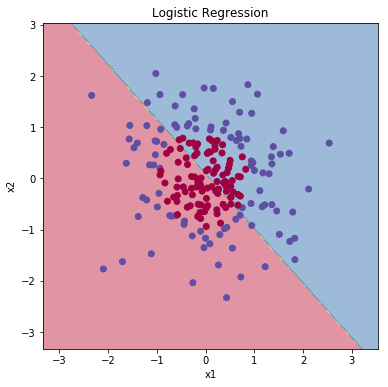

In [6]:
# Print accuracy
LR_predictions = lrc.predict(X.T)
print ('Accuracy of logistic regression: %d'% float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '%.')

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: lrc.predict(x), X, Y[0,:], title='Logistic Regression')


**Conclusion:** The above results were expected since the linear classifier (logistic regression) would never be able to approximate a non-linear decision boundary.

## Neural Network ##

**Set up:** Given data samples $\large \{ x^i \}_{i=1}^m$ where $ \large x^i \in \mathbb{R}^{2}$ and labels $ \large \{ y^i \}_{i=1}^m$ where $\large y^i \in \{0,\ 1\}$. We want to learn a function such that 

$$\large  f(X) = Y, $$

where $\large X \in \mathbb{R}^{2 x m}$, $\large Y \in \mathbb{R}^{1 x m}$, and $\large f$ is a neural network. 

**Architecture:**
![python-scistack](https://cdn-images-1.medium.com/max/1600/1*jDPidgu4d5zF6EkYvKo04w.png)

**Sigmoid Function:** Recall

$$ \large \sigma(x) = \frac{1}{1 + \exp(-x)} $$

The derivative of the sigmoid is given by 

$$ \large \sigma'(x) = \sigma(x) (1 - \sigma(x)) $$

and by the chain rule

$$ \large \sigma'(f(x)) = \sigma(f(x)) ( 1 - \sigma(f(x))) f'(x).$$


**Forward Pass:**
\begin{eqnarray}
\large Z_1 &=&  \large W_1 X + b_1 1_m \\
\\
\large A_1 &=& \large \text{tanh}(Z_1) \ (\text{pw}) \\
\\
\large Z_2 &=&  \large W_2 A_1 + b_2 1_m \\
\\
\large A_2 &=& \large \sigma(Z_2) \ (\text{pw})
\end{eqnarray}


where $\large W_1 \in \mathbb{R}^{4 x 2}$,  $\large b_1 \in \mathbb{R}^{4 x 1}$, $\large Z_1 \in \mathbb{R}^{4 x m}$, $\large A_1 \in \mathbb{R}^{4 x m}$, $\large W_2 \in \mathbb{R}^{1 x 4}$, $\large b_2 \in \mathbb{R}^{1 x 1}$,  $\large Z_2 \in \mathbb{R}^{1 x m}$,  $\large A_2 \in \mathbb{R}^{1 x m}$, and $\large 1_m \in \mathbb{R}^{1 x m}$.

**Number of parameters:** 5?, 12?, 14?, 17?, 20?


**Cost Function:**
Since this is a binary classification problem, we want to minimize the cross function, i.e., 

$$ \large J(W_1, W_2, b_1, b_2) = - \frac{1}{m} \sum_{i=0}^m [y^i \log(A_2^i) + ( 1 - y^i) \log(1 - A_2^i)] $$

**Backpropagation:** Shorthand for the backward propagation of errors from the cost function.

We now show how to derive the gradient descent update for $\large W_2$. First we compute the derivatives of each term in $\large J$ with respect to $\large W_2$, i.e. 

$$\large \nabla_{W_2} \log (\sigma (Z_2^i)) =  \large \nabla_{W_2} \log (\sigma (W_2 A_1^i + b_2 1_m)) = \large (1 - \sigma(Z_2^i)) A_1^i = \large (1 - A_2^i) A_1^i $$

and 

$$\large \nabla_{W_2} \log (1 - \sigma (Z_2^i)) =  \large \nabla_{W_2} \log (1 - \sigma (W_2 A_1^i + b_2 1_m)) = \large -  \sigma(Z_2^i) A_1^i = \large - A_2^i A_1^i. $$

Then 


\begin{eqnarray}
\large \nabla_{W_2} J(W_1, W_2, b_1, b_2) &=& \large - \frac{1}{m} \sum_{i=0}^m  (y^i ( 1 - A_2^i) A_1^i - (1-y^i) A_2^i A_1^i )  \\
&=& \large - \frac{1}{m} \sum_{i=0}^m ( y^i A_1^i - A_2^i A_1^i) \\
&=& \large \frac{1}{m} \sum_{i=0}^m (A_2^i - y^i) A_1^i \\
&=& \large \frac{1}{m} (A_2 - Y) A_1^T.
\end{eqnarray}

**Learning:** The weights/parameters are optimized using gradient descent.




In [7]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """ 
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


In [8]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


In [9]:
def compute_cost(A2, Y, parameters):
    """
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    m = Y.shape[1] # number of samples

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m    
    cost = np.squeeze(cost)
    return cost


In [10]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads


In [11]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


In [12]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(3)
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Gradient descent loop
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters


In [13]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5    
    return predictions


In [14]:
# Build a model with a n_h-dimensional hidden layer
n_h = 4
parameters = nn_model(X, Y, n_h=n_h, num_iterations=5000, print_cost=True)


Cost after iteration 0: 0.693144
Cost after iteration 1000: 0.102363
Cost after iteration 2000: 0.087969
Cost after iteration 3000: 0.087674
Cost after iteration 4000: 0.867403


Accuracy of neural network: 97%


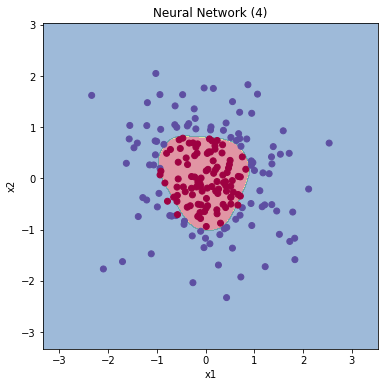

In [15]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy of neural network: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0,:], title=f'Neural Network ({n_h})')


Accuracy for 1 hidden units: 68.5 %


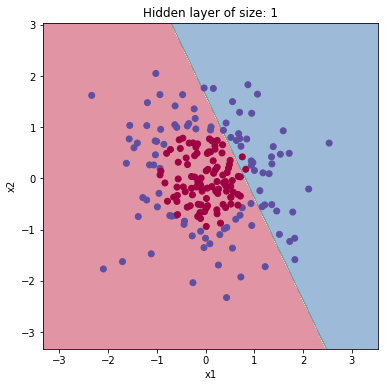

Accuracy for 2 hidden units: 80.5 %


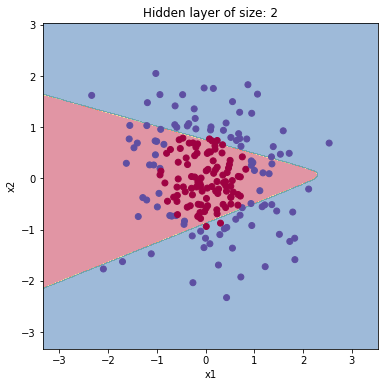

Accuracy for 3 hidden units: 98.0 %


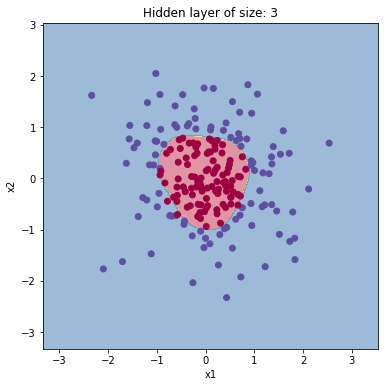

Accuracy for 4 hidden units: 97.5 %


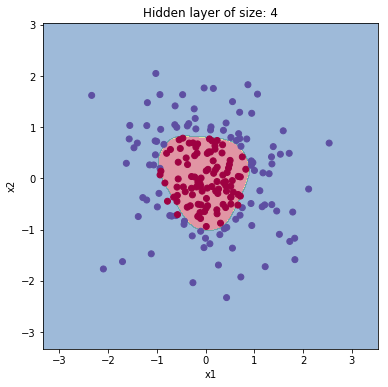

Accuracy for 5 hidden units: 97.5 %


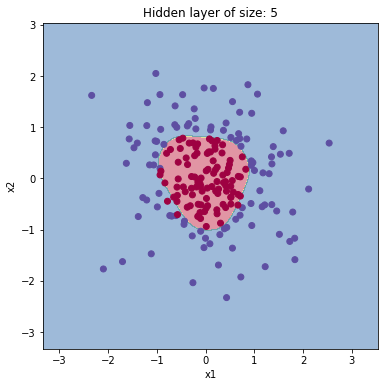

/Users/diegotorrejon/Projects/Other/DL_seminar/VENV/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/diegotorrejon/Projects/Other/DL_seminar/VENV/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


Accuracy for 20 hidden units: 98.0 %


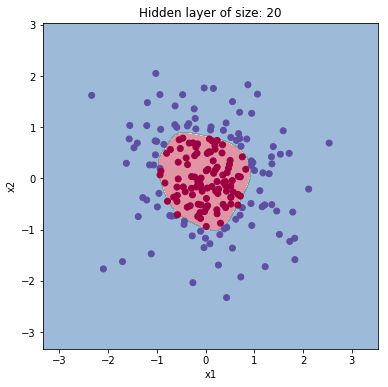

Accuracy for 50 hidden units: 97.5 %


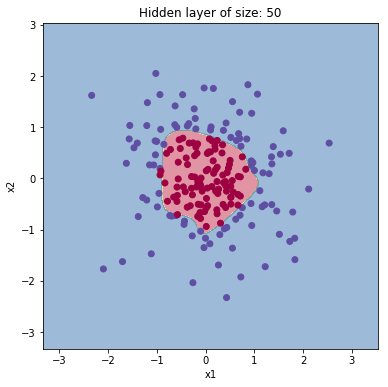

In [16]:
# Running the model with diffrent number of neurons in the hiddern layer
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for n_h in hidden_layer_sizes:
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0,:], title=f'Hidden layer of size: {n_h}')


In [17]:
# What happens if we get rid of the activation function?
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    #A1 = np.tanh(Z1)
    A1 = Z1
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


Accuracy of neural network: 55%


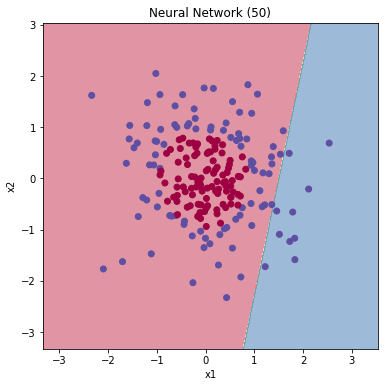

In [18]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy of neural network: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0,:], title=f'Neural Network ({n_h})')


## Logistic Regression (Smart Model)##

Instead of using two spatial features, we train the logistic regression model using the radial feature.


In [19]:
# Train the logistic regression classifier
lrc = sklearn.linear_model.LogisticRegressionCV(cv=5);
w = X[0,:]**2 + X[1,:]**2
lrc.fit(w.reshape(-1, 1), np.ravel(Y.T));


Accuracy of logistic regression: 99% (percentage of correctly labelled datapoints)


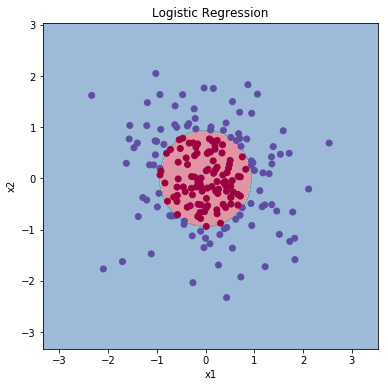

In [20]:
# Print accuracy
LR_predictions = lrc.predict(w.reshape(-1,1))
print ('Accuracy of logistic regression: %d'% float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: lrc.predict(x), X, Y[0,:], title='Logistic Regression', one_flag=True)


**Conclusion:** Neural networks are great at creating and selecting features that are used to solve non-linear classification problems. 

## Next Seminar: Convolutional Neural Networks
